# Notebook | PhyNum : motifs au fond d'une piscine

## Import

In [1]:
from surface import *
from caustiques import *

import cProfile
import pstats

profiler = cProfile.Profile()



## Initialisations

In [2]:
direction = np.array([0, 0, -1])  # direction de la lumière


rayons = []
for i in range(Nx-1):
    rayons.append([])
    for j in range(Ny-1):
        rayons[i].append(Rayon(np.array([(i+1/2)*dx, (j+1/2)*dy, 2*H]), direction, 1))


### Spectre de Phillips

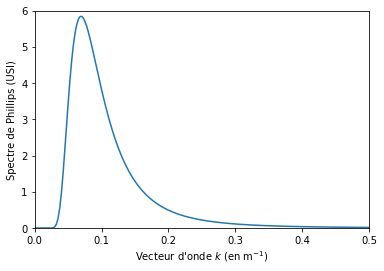

In [3]:
vals_kx = np.linspace(0, 0.5, 200)
spectre = [spectre_Phillips(kx, 0) for kx in vals_kx]

plt.xlim(0, 0.5)
plt.ylim(0, 6)

plt.xlabel(r"Vecteur d'onde $k$ (en m$^{-1})$")
plt.ylabel(r"Spectre de Phillips (USI)")

plt.plot(vals_kx, spectre)
plt.savefig("spectre Phillips.pdf")
plt.show()


### Surface initiale

In [4]:
surface = np.zeros((Nx, Ny))
amplitude_fourier_plus = np.zeros((Nx, Ny), dtype=complex)
amplitude_fourier_moins = np.zeros((Nx, Ny), dtype=complex)

for i in range(Nx):
    for j in range(Ny):
        kx = (i-Nx/2)*dkx
        ky = (j-Ny/2)*dky
        amplitude_fourier_plus[i, j] = random_amplitude_fourier_plus(kx, ky, spectre_Phillips, np.array([1, 0]))

        amplitude_fourier_moins[i, j] = np.conjugate(amplitude_fourier_plus[-i, -j])


update_surface(surface, 0, amplitude_fourier_plus, amplitude_fourier_moins)


## Calculs

In [5]:
profiler.enable()

trajectoires = calcul_trajectoires(rayons, surface, 0, amplitude_fourier_plus, amplitude_fourier_moins)

profiler.disable()



Calcul des trajectoires : 100%|██████████| 255/255 [00:30<00:00,  8.48it/s]


### Profiling

In [6]:
stats = pstats.Stats(profiler).sort_stats("cumtime")
stats.print_stats()


         30769426 function calls (29598933 primitive calls) in 34.698 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   34.698   17.349 c:\Users\Florent\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3403(run_code)
      8/2    0.000    0.000   34.698   17.349 {built-in method builtins.exec}
        1    0.000    0.000   34.698   34.698 C:\Users\Florent\AppData\Local\Temp\ipykernel_4504\3615909661.py:3(<module>)
        1    0.230    0.230   34.698   34.698 c:\Users\Florent\Documents\Travail\M1 Physique (mag 2)\Cours\PhyNum\PhyNum Projet\PhyNum-Piscine\caustiques.py:12(calcul_trajectoires)
   130050    0.410    0.000   25.898    0.000 c:\Users\Florent\Documents\Travail\M1 Physique (mag 2)\Cours\PhyNum\PhyNum Projet\PhyNum-Piscine\raytracing.py:332(find_point_intersection)
   130050    0.316    0.000   24.731    0.000 c:\Users\Florent\Documents\Travail\

In [7]:
motif = calcul_motifs(rayons)

motif = np.sqrt(motif)

image = motif_to_alpha(motif)
plt.imsave(f"images/caustiques {Nx=}.png", image)


## Affichage

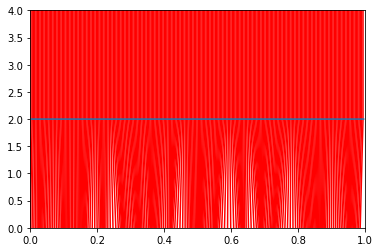

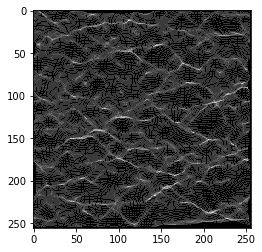

In [8]:
plot_surface(surface)
plt.show()


affiche_rayons(rayons, surface, save=True)
plt.show()


plt.imshow(motif, cmap="gray")
plt.show()


In [9]:

genere_animation(surface, amplitude_fourier_plus, rayons, save_motif=True)


frame: 100%|██████████| 20/20 [08:22<00:00, 25.14s/it]
